In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#from google.colab import files
#uploaded = files.upload()

In [15]:
df = pd.read_csv('house-votes-84.csv')
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [19]:
for i in df.drop(columns='party',axis=1).columns:
  df[i] = np.where(df[i] == 'n', 0, 1)

df['party'] = np.where(df['party'] == 'republican', 0, 1)

df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [20]:
df['party'].value_counts()

1    267
0    168
Name: party, dtype: int64

## k-Nearest Neighbors: Fit

1. Import KNeighborsClassifier from sklearn.neighbors.
2. Create arrays X and y for the features and the target variable. Here this has been done for you. Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.
3. Instantiate a KNeighborsClassifier called knn with 6 neighbors by specifying the n_neighbors parameter.
4. Fit the classifier to the data using the .fit() method.

In [21]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)


KNeighborsClassifier(n_neighbors=6)

## k-Nearest Neighbors: Predict

1. Create arrays for the features and the target variable from df. As a reminder, the target variable is 'party'.
2. Instantiate a KNeighborsClassifier with 6 neighbors.
3. Fit the classifier to the data.
4. Predict the labels of the training data, X.
5. Predict the label of the new data point X_new.

In [22]:
X_temp = [0.696469, 0.286139, 0.226851, 0.551315, 0.719469,  0.423106,  0.980764, 
         0.68483,  0.480932,  0.392118,  0.343178,  0.72905,  0.438572,  0.059678, 0.398044,  0.737995]

In [23]:
X_new = pd.DataFrame(X_temp).T
X_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.696469,0.286139,0.226851,0.551315,0.719469,0.423106,0.980764,0.68483,0.480932,0.392118,0.343178,0.72905,0.438572,0.059678,0.398044,0.737995


In [24]:
# Import KNeighborsClassifier from sklearn.neighbors
#from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))


Prediction: [1]


## The digits recognition dataset

1. Import datasets from sklearn and matplotlib.pyplot as plt.
2. Load the digits dataset using the .load_digits() method on datasets.
3. Print the keys and DESCR of digits.
4. Print the shape of images and data keys using the . notation.

**HINT!**

* To import x from y, use the command from y import x, and use import x as y to import x as the alias y.
* Use datasets.load_digits() to load the digits dataset.
* Use the .keys() method on digits to access its keys, and .DESCR to access its description.
* Inside the provided print() functions, access the images and data keys of digits with digits.images and digits.data. The .shape attribute has already been provided for you.

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

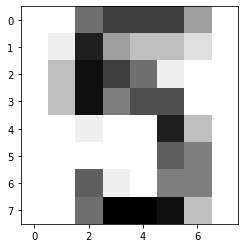

In [9]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## Train/Test Split + Fit/Predict/Accuracy

1. Import KNeighborsClassifier from sklearn.neighbors and train_test_split from sklearn.model_selection.
2. Create an array for the features using digits.data and an array for the target using digits.target.
3. Create stratified training and test sets using 0.2 for the size of the test set. Use a random state of 42. Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.
4. Create a k-NN classifier with 7 neighbors and fit it to the training data.
5. Compute and print the accuracy of the classifier's predictions using the .score() method.

**HINT!**

* Use the command from y import x to import x from y.
* Assign digits.data to the variable X to create an array for the features and assign digits.target to y to create an array for the target variable.
* Use the train_test_split() function and pass in the arguments X, y, and specify the keyword arguments test_size, random_state, and stratify to create the training and test sets.
* Use KNeighborsClassifier() to instantiate the classifier and specify the number of neighbors using the n_neighbors parameter.
* To compute the accuracy of the classifier, use the .score() method on knn with X_test and y_test as arguments.


In [25]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X, y)

# Print the accuracy
print(knn.score(X_test, y_test))


0.9916666666666667
